In [214]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

In [215]:
fp = Path('D:/Development/Data/datasets/txt/alphabet_7x5.txt')

ALPHABET = list('abcdefghijklmnopqrstuvwxyz .,')
letters = np.loadtxt(fp)

n_letters = len(letters)
letter_shape = (7, 5)
letter_size = 35

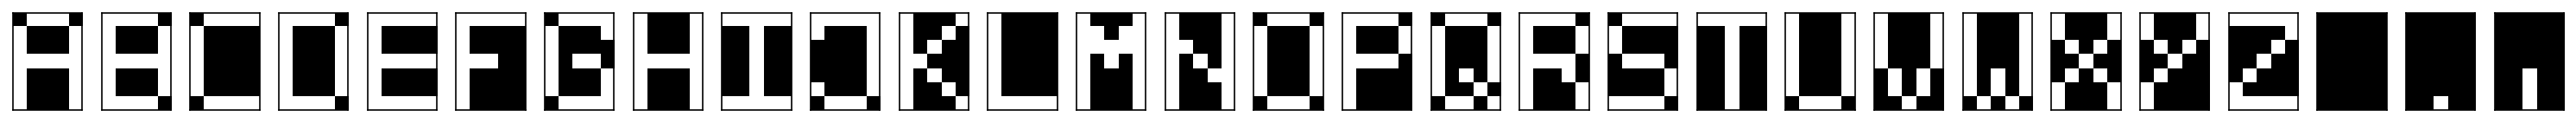

In [216]:
fig, axes = plt.subplots(nrows=1, ncols=n_letters)

fig.set_dpi(150)
fig.set_figwidth(20)
fig.set_figheight(5)

for n, ax in zip(letters, axes.ravel()):
    ax.matshow(n.reshape(letter_shape), cmap='binary_r')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

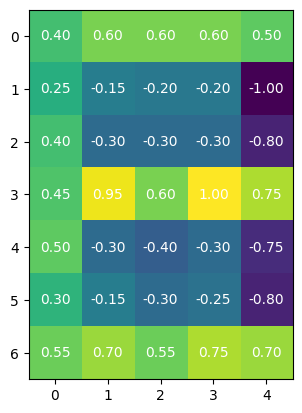

In [217]:
i = 4

t = n_letters*letters[i]

for j in range(n_letters):
    if j != i:
        t -= letters[j]

t = -1 + 2 * (t-np.min(t))/(np.max(t)-np.min(t))
t = t.reshape(letter_shape)

plt.imshow(t, cmap='viridis')
for (i, j), z in np.ndenumerate(t):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='white')
plt.show()

In [218]:
def one_hot(n_classes: int, idx: int) -> np.ndarray:
    encoding = np.zeros(n_classes)
    encoding[idx] = 1.0
    return encoding

In [219]:
labels = list([one_hot(n_letters, i) for i in range(n_letters)])

In [220]:
def word2seq(word: str) -> list[np.ndarray]:
    return [letters[ALPHABET.index(ch)] for ch in word]


In [221]:
def binary_step(x: np.ndarray) -> np.ndarray:
    return 1.0 * (x > 0.0)

In [304]:
w = np.random.uniform(-1.0, 1.0, (n_letters, letter_size))

n_epochs = 64

for epoch in range(n_epochs):
    for i in range(n_letters):
        x = letters[i]
        u = np.dot(w,x)
        y = binary_step(u)

        for j in range(n_letters):
            if j == i:
                if y[j] != 1.0:
                    w[j] += n_letters*x
            else:
                if y[j] != 0.0:
                    w[j] -= x

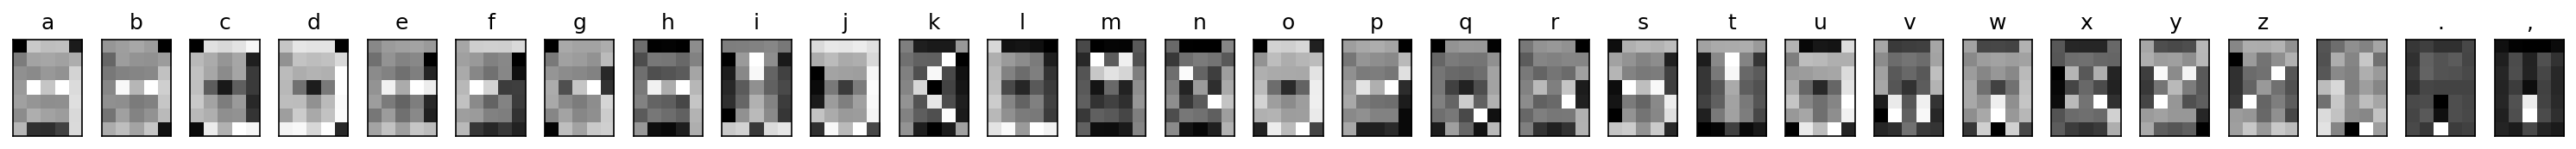

In [305]:
fig, axes = plt.subplots(nrows=1, ncols=n_letters)

fig.set_dpi(150)
fig.set_figwidth(20)
fig.set_figheight(5)

for i, ax in enumerate(axes.ravel()):
    ax.matshow(w[i].reshape(letter_shape), cmap='binary_r')
    ax.set_title(ALPHABET[i])

    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [306]:
U = np.array([np.dot(w,x) for x in letters])
Y = np.array([np.argmax(binary_step(u)) for u in U])
Y_hat = np.array([np.argmax(l) for l in labels])
t = np.array([1 if a==b else 0 for a,b in zip(Y, Y_hat)])

print(Y.tolist())
print(Y_hat.tolist())
print(t.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 0, 27, 28]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [308]:
text = 'the quick brown fox jumps over the lazy dog'
words = text.split(' ')

noise_size = 0.5
noise = np.random.uniform(-noise_size, noise_size, letter_size)

encoded_words = [word2seq(word)+noise for word in words]

chrs = [[int(np.argmax(np.dot(w,x))) for x in ew] for ew in encoded_words]

decoded_text = []
for chlist in chrs:
    word = ''.join([ALPHABET[i] for i in chlist])
    decoded_text.append(word)

print(' '.join(decoded_text))

the quick brown fox jumps over the lazy dog
